<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 3: Large-Scale Data Exploration for Insider Threat Detection  (2022)
---

The completion of this worksheet is worth a **maximum of 45 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>

### Assessment and Marking
---

Marks will be allocated within the following criteria:

* **Identification and justification of the suspicious behaviour (15)**
* **Analytical process and reasoning to deduce the suspicious behaviour (15)**
* **Use of informative visualisation and data exploration techniques (10)**
* **Clarity and professional presentation (5)**

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---


## Load in the data

In [44]:
# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.

import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import warnings
warnings.filterwarnings("ignore")

dataset_list = ['onlinebargains']
DATASET = dataset_list[0]

def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)
employee_data

,user,role,email,pc
0,usr-uda,Security,usr-uda@onlinebargains.com,pc0
1,usr-hhe,Security,usr-hhe@onlinebargains.com,pc1
2,usr-vxr,Finance,usr-vxr@onlinebargains.com,pc2
3,usr-nba,Finance,usr-nba@onlinebargains.com,pc3
4,usr-hqt,Finance,usr-hqt@onlinebargains.com,pc4
...,...,...,...,...
244,usr-jwo,Finance,usr-jwo@onlinebargains.com,pc244
245,usr-hiz,Security,usr-hiz@onlinebargains.com,pc245
246,usr-svz,Services,usr-svz@onlinebargains.com,pc246
247,usr-ndr,HR,usr-ndr@onlinebargains.com,pc247


In [2]:
login_data

,datetime,user,action,pc
0,2020-01-01 00:21:33,usr-hyo,login,pc205
1,2020-01-01 00:21:39,usr-ipd,login,pc230
2,2020-01-01 00:34:25,usr-nrx,login,pc169
3,2020-01-01 00:35:10,usr-hfz,login,pc111
4,2020-01-01 00:39:04,usr-hhe,login,pc1
...,...,...,...,...
166825,2020-11-30 23:42:54,usr-ays,logoff,pc167
166826,2020-11-30 23:44:18,usr-alj,logoff,pc168
166827,2020-11-30 23:51:29,usr-nic,logoff,pc180
166828,2020-11-30 23:56:34,usr-vul,logoff,pc54


In [4]:
web_data

,datetime,user,website
0,2020-01-01 00:41:43.758417,usr-hfz,http://www.nifty.com
1,2020-01-01 01:21:44.679230,usr-wyj,http://www.posterous.com
2,2020-01-01 01:56:46.732056,usr-hvk,http://www.accuweather.com
3,2020-01-01 02:12:06.445196,usr-hfz,http://www.helpineedasecurity.net
4,2020-01-01 02:29:56.212579,usr-nrx,http://www.hc360.com
...,...,...,...
1376144,2020-11-30 22:52:41.821194,usr-ypo,http://www.prlog.org
1376145,2020-11-30 23:00:18.330519,usr-qat,http://www.sky.com
1376146,2020-11-30 23:18:50.514451,usr-ays,http://www.python.com
1376147,2020-11-30 23:19:03.111176,usr-nic,http://www.ebay.co.uk


The cell above is creating a set of DataFrames to work with. The set of tables are named as follows:

* employee_data
* login_data
* usb_data
* web_data
* file_data
* email_data



# Begin investigation





   
   




### 1. Logins 
1. To start I investigated if any user has accessed someone's else pc. For this i have Used 2 dataframes. 
   1. Employee 
   To find out which pc belongs to which user.
   2. Login
   To check login activities of users on the PCs.


### Logins

In [51]:
# ANSWER
employee_pc = employee_data.user + '_' + employee_data.pc
employee_data['employee_pc']  = employee_pc

# Checking if the users used the same pc they were assigned. 
pcs = employee_data[['user','pc']]
pcs.rename(columns={'pc': 'employee_pc'}, inplace=True)

loginss = login_data.groupby(['user','action','pc']).size().reset_index()
log = loginss[['user','pc']]
log.rename(columns={'pc': 'login_pc'}, inplace=True)


merge1 = pd.merge(pcs, log, on='user')

merge1.loc[~(merge1['employee_pc'] == merge1['login_pc'])]

,user,employee_pc,login_pc


**No one used any PC other than the PC assigned to it.**

-------------------------------------------------

### 2. USB Insertion
2. Then i investigated that if a user has inserted usb on any pc other than his pc. For this i have Used 2 dataframes. 
   1. Employee 
   To find out which pc belongs to which user.
   2. Usb Data
   To check usb insert activities of users on the PCs.

**Here we have found that the <u>*user has inserted his usb*</u> in to someone's PC.**

### USB insertion

In [59]:
# ANSWER
# Checking if the users used the same pc to insert usb they were assigned. 

usb_insert = usb_data.groupby(['user','action','pc']).size().reset_index()
usb = usb_insert[['user','pc']]
usb.rename(columns={'pc': 'usb_pc'}, inplace=True)


merge2 = pd.merge(pcs, usb, on='user')

merge2.loc[~(merge2['employee_pc'] == merge2['usb_pc'])]

,user,employee_pc,usb_pc
196,usr-rhd,pc152,pc248
197,usr-rhd,pc152,pc248



----------------

### 3. Web Data
3. I investigated with the websites accessed by each user and i couldnt find access to any of malicious website. 
   
   For this i have Used 2 dataframes. 
   1. Employee 
   To find out which pc belongs to which user.
   2. Web_data
   To check websites accessed by users.

### WEB data

In [64]:
web_data.head()
web_data.website.value_counts()

http://www.sky.com                    49266
http://www.hc360.com                  49151
http://www.eventbrite.com             49107
http://www.bbc.co.uk                  49010
http://www.businessinsider.com        48897
http://www.twitter.com                48867
http://www.accuweather.com            48806
http://www.prlog.org                  48767
http://www.eepurl.com                 48752
http://www.google.com                 48698
http://www.microsoft.com              48687
http://www.nba.com                    48672
http://www.amazon.co.uk               48659
http://www.posterous.com              48630
http://www.friendfeed.com             48627
http://www.nifty.com                  48624
http://www.psu.edu                    48498
http://www.facebook.com               48491
http://www.ebay.co.uk                 48465
http://www.seesaa.net                 48437
http://www.theatlantic.com            48432
http://www.ilovesecurity.com          26111
http://www.securityneeds.com    



-------------------

### 4. File Data
4. I investigated with the files accessed by each user and i couldnt find access to any of malicious website. 
   
   For this i have Used 2 dataframes. 
   1. Employee 
   To find out which pc belongs to which user.
   2. File_data
   To check websites accessed by users.


### File Data

In [84]:
files =file_data.loc[((file_data['user'] =='usr-rhd')  | (file_data['user'] =='usr-eie')) & (file_data['datetime']> '2020-08-07') & (file_data['datetime']< '2020-08-11')]
files.filename.value_counts()

/docs/employment        60
/newsletter             38
/company_profile        34
/docs/committee         32
/docs/social            32
/misc                   30
/policy                 28
/docs                   27
/secret                 23
/docs/general           22
/system/general         22
/newsletter/general     21
/do_not_delete          20
/FYEO                   14
/tech                   14
/private                14
/docs/clients           13
/private/staffreview    11
Name: filename, dtype: int64




-------------------
### 5. Email Data
   I investigated with the email data if there are any emails where the sender and receipient have the same address. The aim is to find if someone has shared files to himself via email. 
   
   For this i have Used 2 dataframes. 
   1. Employee 
   To find out which pc belongs to which user.
   2. Email Data_data
   To check the recipient and sender of email.


### Email Data

In [89]:
email_data.loc[(email_data['sender'] =='usr-rhd@onlinebargains.com') & (email_data['recipient'] == 'usr-rhd@onlinebargains.com')]

,datetime,sender,recipient
54811,2020-01-05 17:08:57.340538,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
67885,2020-01-06 21:45:18.141878,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
115840,2020-01-11 10:10:45.373160,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
168687,2020-01-15 18:53:43.505813,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
219244,2020-01-20 11:45:33.359564,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
...,...,...,...
3557389,2020-11-09 18:41:44.642462,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
3564319,2020-11-10 13:07:23.906749,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
3727891,2020-11-25 07:05:29.915002,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
3761511,2020-11-28 06:13:11.577331,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com


# Conclusion - Summary of Findings

1. User-rhd who is a director has inserted a usb in usr-eie's pc i.e pc248. 

2. He belongs to Finance department. User has inserted usb in 'usr-eie's' PC for 8 times between 07 August 2020 to 10 August 20202.

In [62]:
# ANSWER
usb_data.loc[(usb_data['user'] =='usr-rhd') & (usb_data['pc'] == 'pc248')]

,datetime,user,action,pc
302102,2020-08-07 13:59:39.095515,usr-rhd,usb_insert,pc248
302248,2020-08-07 14:58:32.019707,usr-rhd,usb_remove,pc248
302412,2020-08-07 16:12:32.850255,usr-rhd,usb_insert,pc248
302508,2020-08-07 17:10:00.669627,usr-rhd,usb_remove,pc248
302613,2020-08-07 19:19:47.099527,usr-rhd,usb_insert,pc248
302619,2020-08-07 19:31:43.307955,usr-rhd,usb_insert,pc248
302623,2020-08-07 19:39:24.596043,usr-rhd,usb_remove,pc248
302628,2020-08-07 19:47:37.555743,usr-rhd,usb_remove,pc248
302633,2020-08-07 20:10:14.118667,usr-rhd,usb_insert,pc248
302637,2020-08-07 20:37:30.891533,usr-rhd,usb_remove,pc248


Following files have been accessed by the users 'usr-rhd' and 'usr-eie' during the time when user 'usr-rhd' inserted his usb in user 'usr-eie' PC. 

Here files of concern are 

- /secret                
- docs/clients           
- /private                
- /docs/employment        
- /private/staffreview
- /company_profile 


**I believe the user 'usr-rhd' has transferred some of these files from the victim's  PC.**

**Here i have factored in both users because i am not sure  about which user to look as the data in the file table may be showing either 'usr-rhd' is accessing those files or 'usr-eie' as the PC belongs to 'usr-eie' and the datalog may be logging the user session not the actual user.**

In [83]:
files =file_data.loc[((file_data['user'] =='usr-rhd')  | (file_data['user'] =='usr-eie')) & (file_data['datetime']> '2020-08-07') & (file_data['datetime']< '2020-08-11')]
files.filename.value_counts()

/docs/employment        60
/newsletter             38
/company_profile        34
/docs/committee         32
/docs/social            32
/misc                   30
/policy                 28
/docs                   27
/secret                 23
/docs/general           22
/system/general         22
/newsletter/general     21
/do_not_delete          20
/FYEO                   14
/tech                   14
/private                14
/docs/clients           13
/private/staffreview    11
Name: filename, dtype: int64

### Files accessed in the ambigious window.

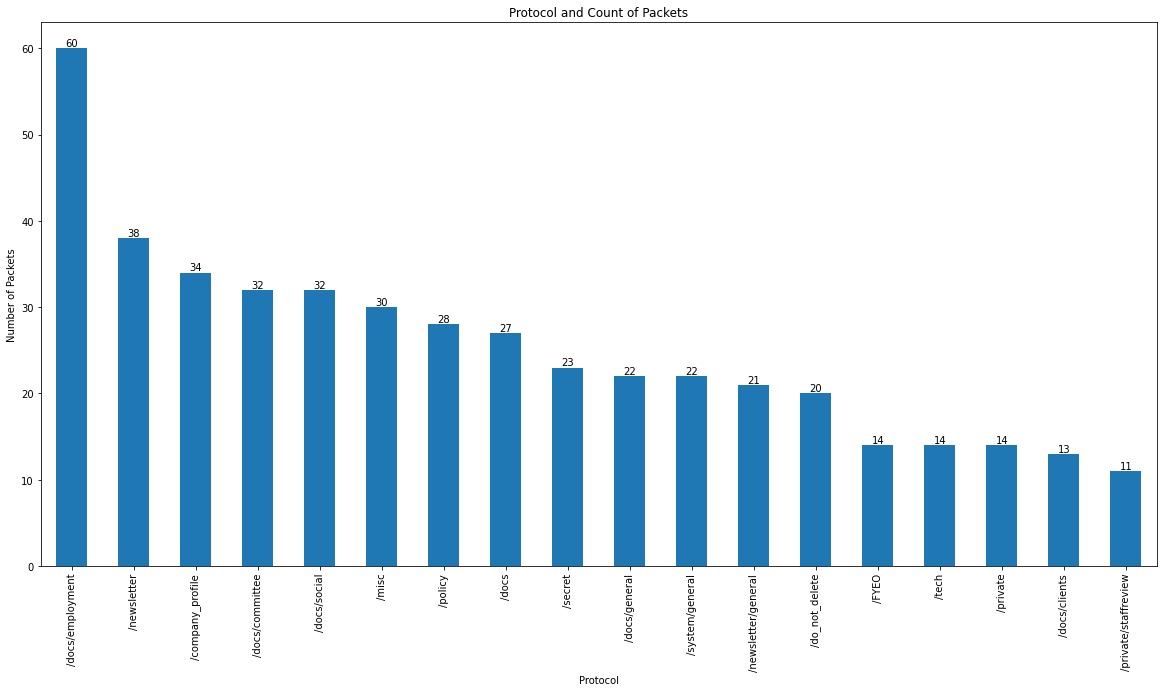

In [93]:
# ANSWER
ax = files['filename'].value_counts().plot(kind='bar',figsize=(20,10),title='Protocol and Count of Packets', ylabel='Number of Packets', xlabel='Protocol',)
for container in ax.containers:
    ax.bar_label(container)

In the same time window, he shared these emails to himself, i am asuming here that these are files from someone else's pc and he share that to him over email.

In [92]:
email_data.loc[(email_data['sender'] =='usr-rhd@onlinebargains.com') & (email_data['recipient'] == 'usr-rhd@onlinebargains.com')& 
    (file_data['datetime']> '2020-08-07') & (file_data['datetime']< '2020-08-11')]

,datetime,sender,recipient
2488857,2020-08-07 13:00:03.195703,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
2500664,2020-08-08 13:22:56.705233,usr-rhd@onlinebargains.com,usr-rhd@onlinebargains.com
